In [1]:
import pandas as pd

In [2]:
import psycopg2
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
OUT_DIR="ExperimentResult"

In [5]:
PGHOST = 'cs598-ccc.ccloxhsqkhj3.us-east-1.rds.amazonaws.com'
PGDATABASE = 'cs598-ccc'
PGUSER = 'postgres'
PGPASSWORD = 'yXzgbn8YXZ2ZfMRwgX83'

def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ PGHOST +" port="+ "5432" +" dbname="+ PGDATABASE +" user=" + PGUSER \
                  +" password="+ PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [6]:
test_list = [('CpuIntensiveFunction', 'factorial_1', 'yunxuan_factorial_no_feature_1200'),
            ('MemoryIntensiveFunction', 'array_summation_1', 'yunxuan_arraysum_no_feature_1200' ),
            ('ImageProcessingFunction', 'grayscale_conversion_1', 'yunxuan_grayscale_1118_no_feature'),
            ('BigDataProcessingFunction', 'big_data_processing_1', 'yunxuan_bigdata_no_feature_1200')]

In [7]:
# Connecting to DB
conn, cursor = connect()

query = """select *
from public.logs_processor_data
where function_name='factorial_1' and experiment_id='yunxuan_factorial_no_feature_1200'
order by created_date asc;"""

# Execute SQL Command and commit to DB
res = cursor.execute(query)
conn.commit()

Connected!


In [8]:
df_result = []
for (functionType, functionName, experimentID) in test_list:
    query = f"""select *
    from public.logs_processor_data
    where function_name='{functionName}' and experiment_id='{experimentID}'
    order by created_date asc;"""
    temp = pd.read_sql(query, conn)
    
    temp['duration'] = temp.payload.apply(lambda x: (x['duration']))
    temp['memory_size'] = temp.payload.apply(lambda x: (x['memory_size']))
    temp['billed_duration'] = temp.payload.apply(lambda x: (x['billed_duration']))
    temp['max_memory_used'] = temp.payload.apply(lambda x: (x['max_memory_used']))
    temp.reset_index(inplace=True)
    
    temp['functionType'] = functionType
    df_result.append(temp)
df = pd.concat(df_result)

/var/folders/84/m8d2wwfj2w11w22qzkhhybg00000gp/T/ipykernel_65160/70311217.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/84/m8d2wwfj2w11w22qzkhhybg00000gp/T/ipykernel_65160/70311217.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/84/m8d2wwfj2w11w22qzkhhybg00000gp/T/ipykernel_65160/70311217.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql(query, conn)
/var/folders/84/m8d2wwfj2w11w22qzkhhybg00000gp/T/ipyker

In [9]:
df.groupby("functionType").size()

functionType
BigDataProcessingFunction    1438
CpuIntensiveFunction         1340
ImageProcessingFunction      1371
MemoryIntensiveFunction      1929
dtype: int64

In [10]:
df.head()

,index,request_id,function_name,payload,created_date,status,experiment_id,duration,memory_size,billed_duration,max_memory_used,functionType
0,0,db35062d-a910-4629-8cc9-d31fa865e043,factorial_1,"{'duration': 28.14, 'function_id': 'factorial_...",2023-11-18 03:09:59.548144,P,yunxuan_factorial_no_feature_1200,28.14,2048,29,53,CpuIntensiveFunction
1,1,d25a6d40-020f-4d2e-a1dd-c27e4eebe15b,factorial_1,"{'duration': 14.11, 'function_id': 'factorial_...",2023-11-18 03:09:59.550754,P,yunxuan_factorial_no_feature_1200,14.11,2048,15,53,CpuIntensiveFunction
2,2,fa47eb56-0e74-4312-a009-3d3b385c8f57,factorial_1,"{'duration': 11.99, 'function_id': 'factorial_...",2023-11-18 03:09:59.565409,P,yunxuan_factorial_no_feature_1200,11.99,2048,12,53,CpuIntensiveFunction
3,3,e167070f-ad8c-4e1b-aba5-2fe02205edeb,factorial_1,"{'duration': 11.22, 'function_id': 'factorial_...",2023-11-18 03:09:59.566804,P,yunxuan_factorial_no_feature_1200,11.22,2048,12,53,CpuIntensiveFunction
4,4,da821246-4f48-48b1-9cc8-bca2c9be0edb,factorial_1,"{'duration': 11.29, 'function_id': 'factorial_...",2023-11-18 03:09:59.567979,P,yunxuan_factorial_no_feature_1200,11.29,2048,12,54,CpuIntensiveFunction


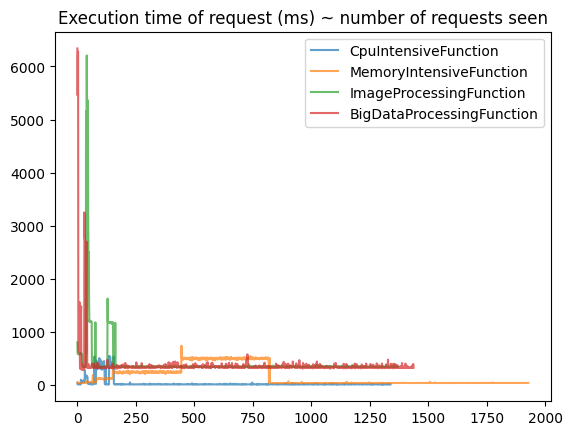

In [11]:
for (functionType, functionName, experimentID) in test_list:
    plt.plot(df[df.function_name==functionName].index, df[df.function_name==functionName].duration, alpha=0.7, label=functionType)
    plt.legend()
plt.title("Execution time of request (ms) ~ number of requests seen")
plt.savefig(os.path.join(OUT_DIR,'H1_ExecutionTimeVsNumberOfRequests.png'))

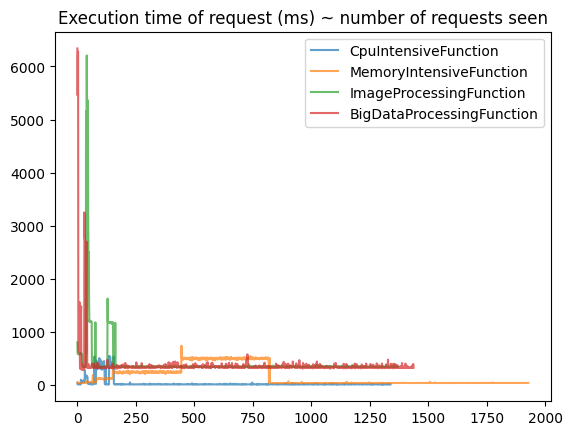

In [12]:
for (functionType, functionName, experimentID) in test_list:
    plt.plot(df[df.function_name==functionName].index, df[df.function_name==functionName].duration, alpha=0.7, label=functionType)
    plt.legend()
plt.title("Execution time of request (ms) ~ number of requests seen")
plt.savefig(os.path.join(OUT_DIR,'H1_ExecutionTimeVsNumberOfRequests.png'))

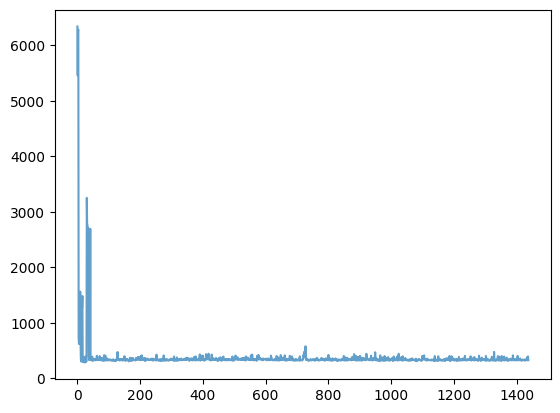

In [18]:
plt.plot(df[df.function_name=='big_data_processing_1'].index, df[df.function_name=='big_data_processing_1'].duration, alpha=0.7, label=functionType)
    

In [8]:
# Connecting to DB
conn, cursor = connect()

query = """select *
from public.logs_processor_data
where experiment_id='yunxuan_bigdata_no_feature_cost_1130'
order by created_date asc;"""

# Execute SQL Command and commit to DB
df = pd.read_sql(query, conn)

Connected!


/var/folders/84/m8d2wwfj2w11w22qzkhhybg00000gp/T/ipykernel_20104/1317506192.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
df['cost'] = df.payload.apply(lambda x: (x['cost']))

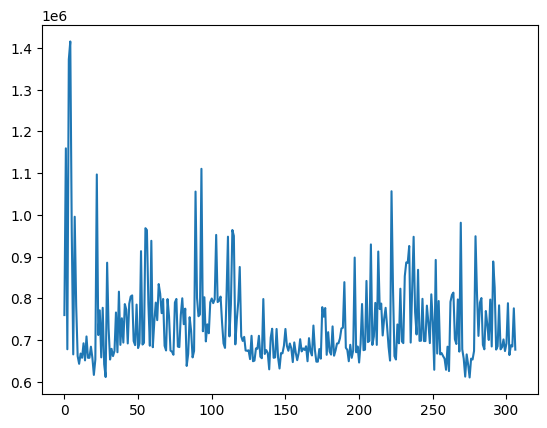

In [12]:
plt.plot(df.index, df.cost)